## IMSA-NUIST Training-2023 (ekwacu@gmail.com) 

### Script-wind speed and direction plot-climatology

In [1]:
# Import existing code modules
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#uploaded.keys()
ds = xr.open_dataset('C:/Diabatic_data/WIND/uvwind_mon/uvwind1_1961-2021.nc')  ##input file
#ds
#ds1.var
ds.data_vars

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Data variables:
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...

In [3]:
#wspd.lev  # print presure level
ds = ds.sel(lev=85000) #selecting to the pressure level
#ds

In [4]:
ds.coords['lon']=(ds.coords['lon']+180)%360-180
ds=ds.sortby(ds.lon) 

In [5]:
#specify the period of interest
obs_clim = ds.sel(time=slice("1961-01-01", "2021-12-01"))

In [6]:
####For seasonal analysis
Data_seas = obs_clim.groupby('time.season')   
#Data_seas
d2 = Data_seas['DJF']
d3 = Data_seas['MAM']
d4 = Data_seas['JJA']
d5 = Data_seas['SON']
#d4

In [8]:
####For yearly analysis
d6=obs_clim.groupby('time.year').mean('time')
#d6

In [12]:
#Make an average of the wind variables
wspd_wind = np.mean(np.sqrt(np.add(np.square(d6.u),np.square(d6.v))),axis=0)
u_wind = np.mean(d6.u,axis=0)
v_wind = np.mean(d6.v,axis=0)
#u_wind

In [13]:
#setting up the quiver arguments (these display the wind vectors on the plot)
xx_wind = wspd_wind.lon.values
yy_wind = wspd_wind.lat.values
X_wind,Y_wind =np.meshgrid(xx_wind, yy_wind)
U_wind = u_wind.data
V_wind = v_wind.data

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\

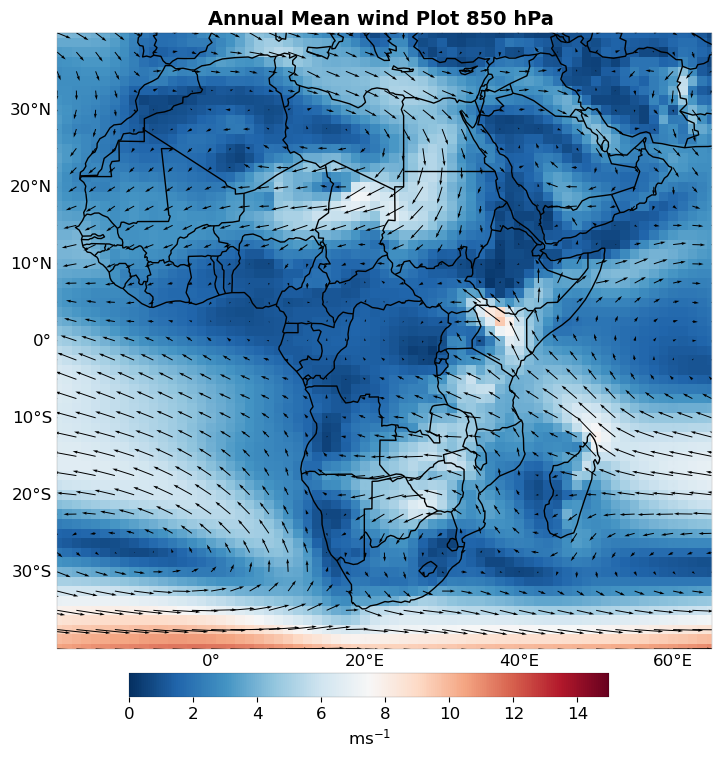

In [14]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=100)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
speed_plot = plt.pcolormesh(wspd_wind['lon'], wspd_wind['lat'], wspd_wind, cmap='RdBu_r',
               vmin=0, vmax=15)
plt.quiver(X_wind[::2, ::2], Y_wind[::2, ::2], U_wind[::2, ::2], V_wind[::2, ::2], 
           transform=ccrs.PlateCarree(), color='k', scale=180, width=0.0015,)
#lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
#ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
plt.xlim([-20, 65])
plt.ylim([-40, 40])
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('Annual Mean wind Plot 850 hPa ',fontsize=14, fontweight='bold')
colorbar_axes = plt.gcf().add_axes([0.3, 0.05, 0.4, 0.03])
plt.colorbar(speed_plot, colorbar_axes, label='ms$^{-1}$', orientation='horizontal')
#plt.text(0.08, 0.36, 'ERA5 (600 hPa)',fontsize=14,fontweight='bold', rotation='vertical',
#         transform=plt.gcf().transFigure)
# save output
#plt.savefig('C:/ERSSTv5/Annual_ERA5-wind.png')
plt.show()

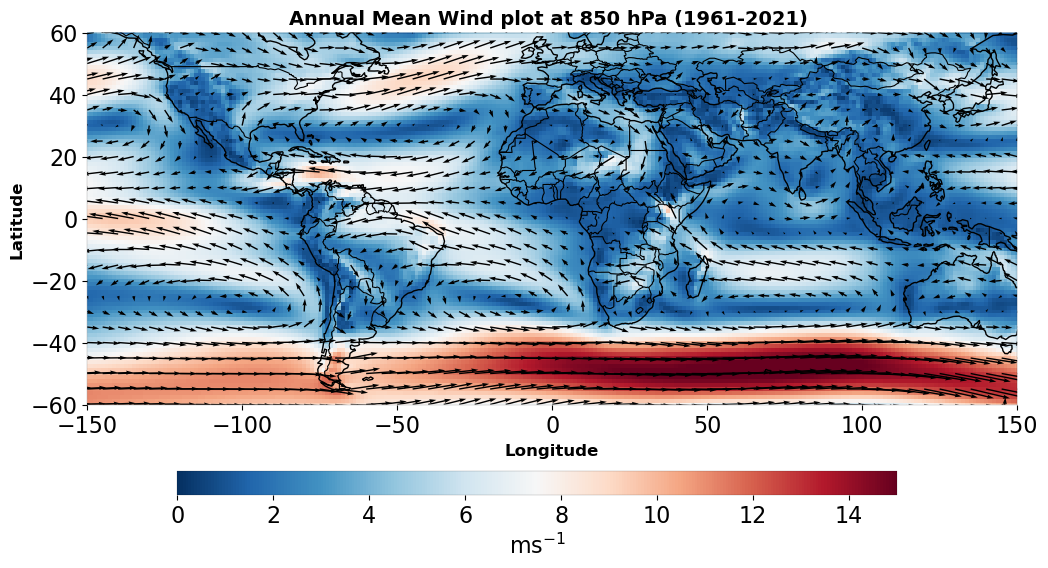

In [15]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=100)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
speed_plot = plt.pcolormesh(wspd_wind['lon'], wspd_wind['lat'], wspd_wind, cmap='RdBu_r',
               vmin=0, vmax=15)
plt.quiver(X_wind[::4, ::4], Y_wind[::4, ::4], U_wind[::4, ::4], V_wind[::4, ::4], 
           transform=ccrs.PlateCarree(), color='k', scale=300, width=0.0015,)
lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
#ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
#gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
#gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
#gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.xlim([-150, 150])
plt.ylim([-60, 60])
ax.set_xticks(range(-150, 170, 50), crs=ccrs.PlateCarree(central_longitude=0))
ax.set_yticks(range(-60, 80, 20), crs=ccrs.PlateCarree(central_longitude=0))

plt.title('Annual Mean Wind plot at 850 hPa (1961-2021) ',fontsize=14, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=12, fontweight='bold')
plt.xlabel('Longitude',fontsize=12, fontweight='bold')
colorbar_axes = plt.gcf().add_axes([0.2, 0.15, 0.6, 0.03]) #(left,up/down )
plt.colorbar(speed_plot, colorbar_axes, label='ms$^{-1}$', orientation='horizontal')
plt.savefig('C:/Diabatic_data/WIND/uvwind_mon/JRA55_Mean_wind_plot_1961-2021.png', dpi=300)
plt.show()

## God's Favorite 